<a href="https://colab.research.google.com/github/RostislavB74/NN_HW9/blob/main/GoIT_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
#Завантажуємо Датасет
from keras.datasets import fashion_mnist

Параметри

In [15]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 28*28 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


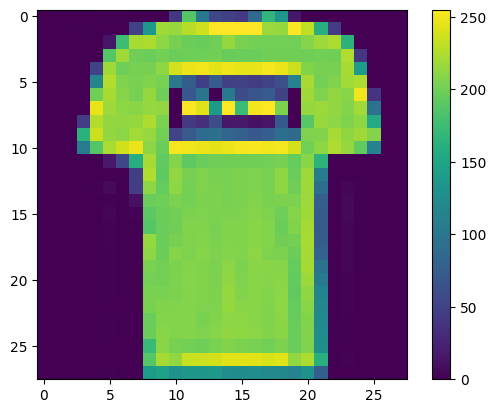

In [9]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)


# ДЗ-9

In [10]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
# Нормалізуємо значення пікселів
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

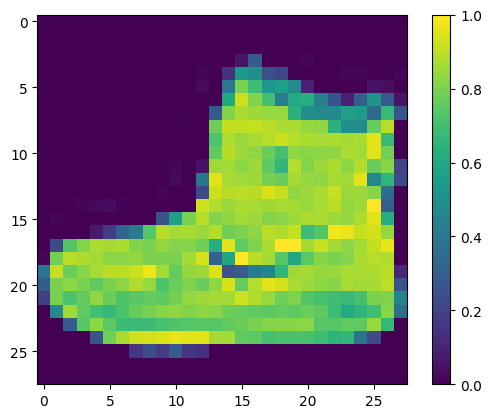

In [12]:
plt.figure()
plt.imshow(x_train_1[0])
plt.colorbar()
plt.grid(False)

Подивимось датасет частково

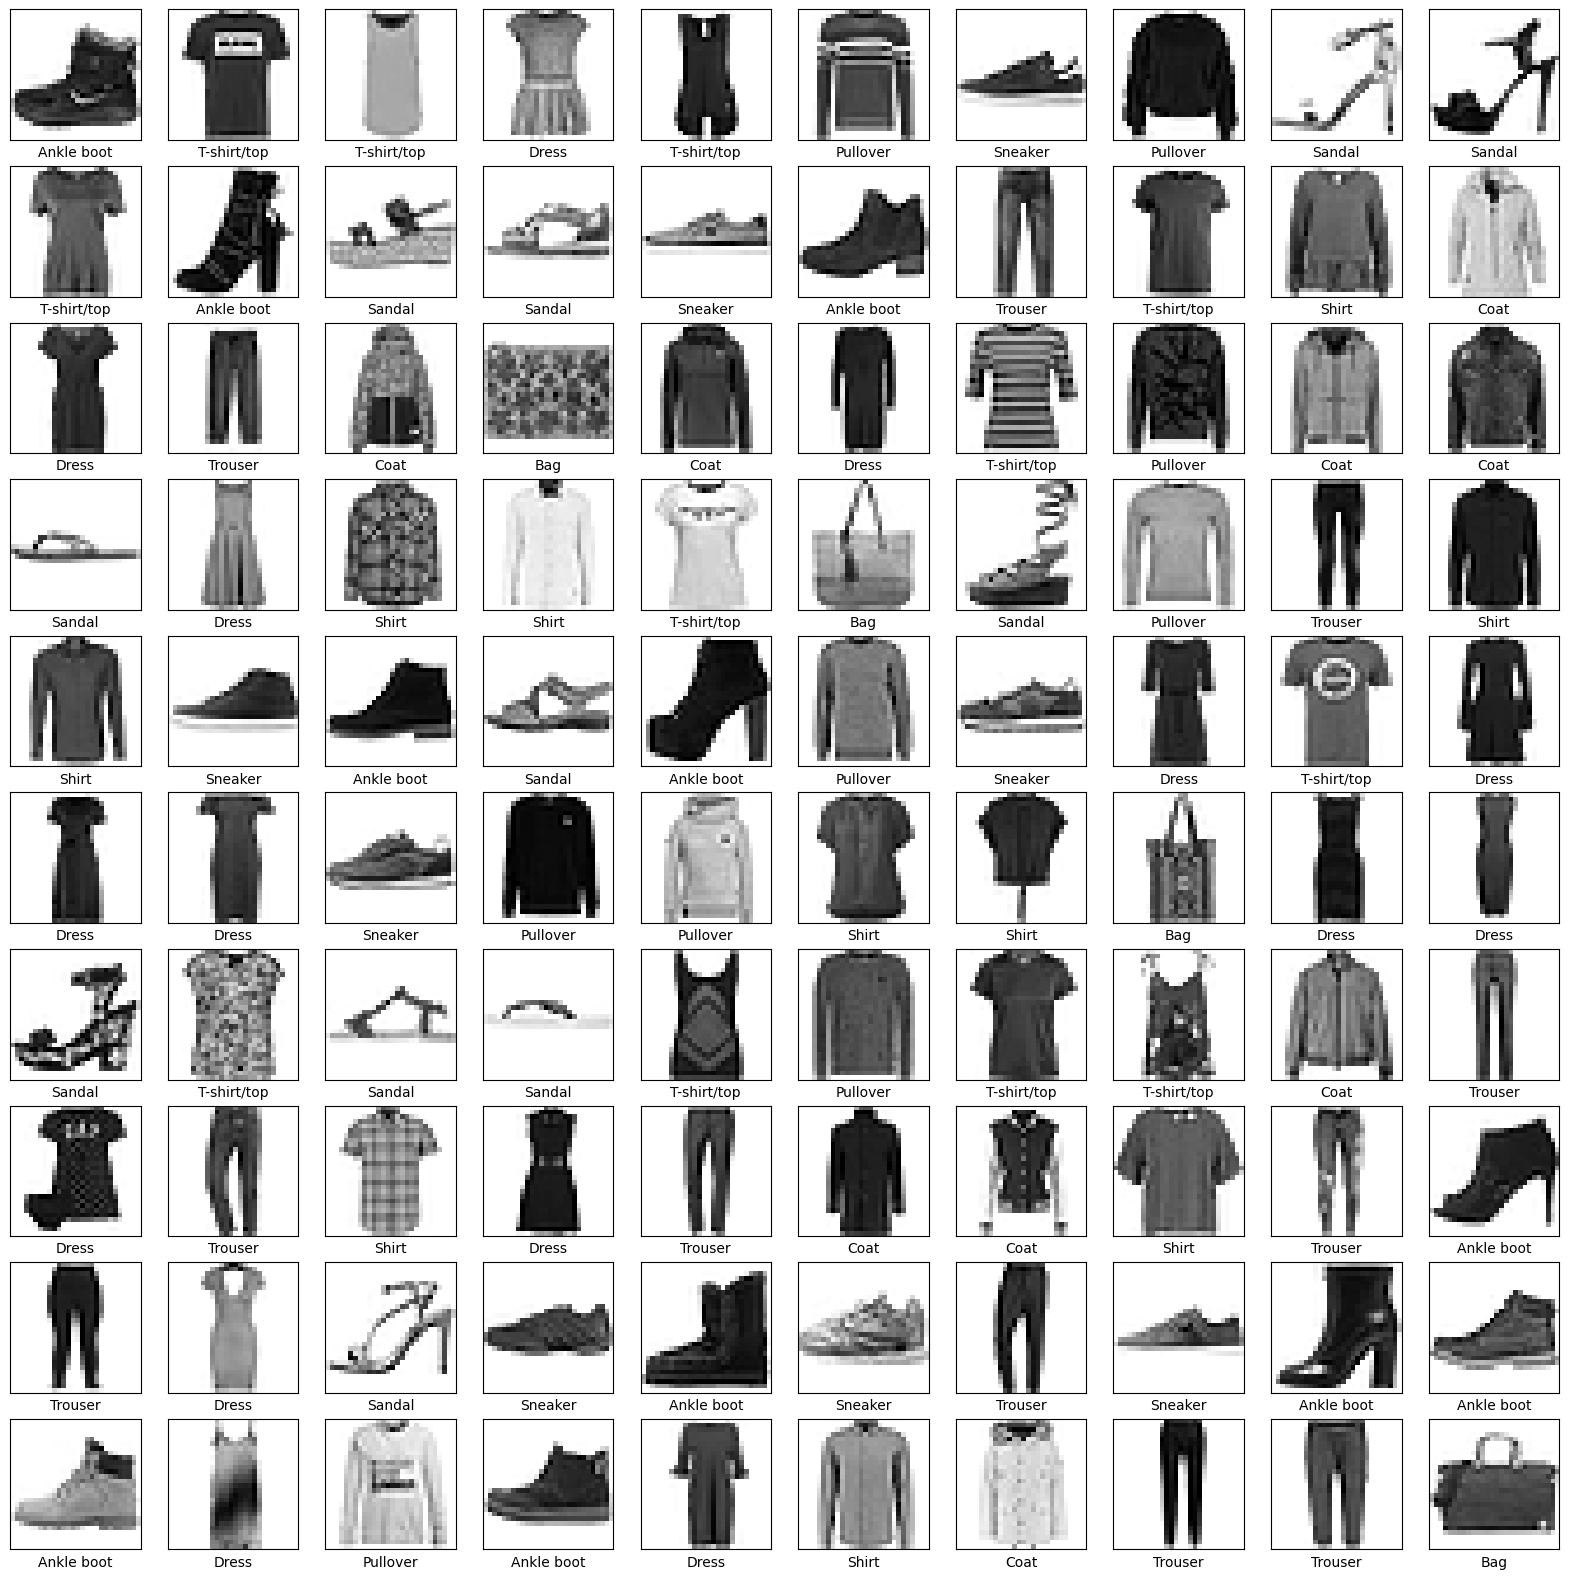

In [13]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_1[i]])


In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [ ]:
Копиляція моделі

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 11s 5ms/step - loss: 0.4986 - accuracy: 0.8198 - val_loss: 0.4055 - val_accuracy: 0.8527
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3702 - accuracy: 0.8639 - val_loss: 0.3661 - val_accuracy: 0.8666
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3340 - accuracy: 0.8751 - val_loss: 0.3445 - val_accuracy: 0.8751
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3106 - accuracy: 0.8847 - val_loss: 0.3290 - val_accuracy: 0.8779
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2930 - accuracy: 0.8907 - val_loss: 0.3431 - val_accuracy: 0.8789
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2764 - accuracy: 0.8962 - val_loss: 0.3455 - val_accuracy: 0.8804
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2610 - accuracy: 0.9021 - val_loss: 0.3333 - val_accuracy

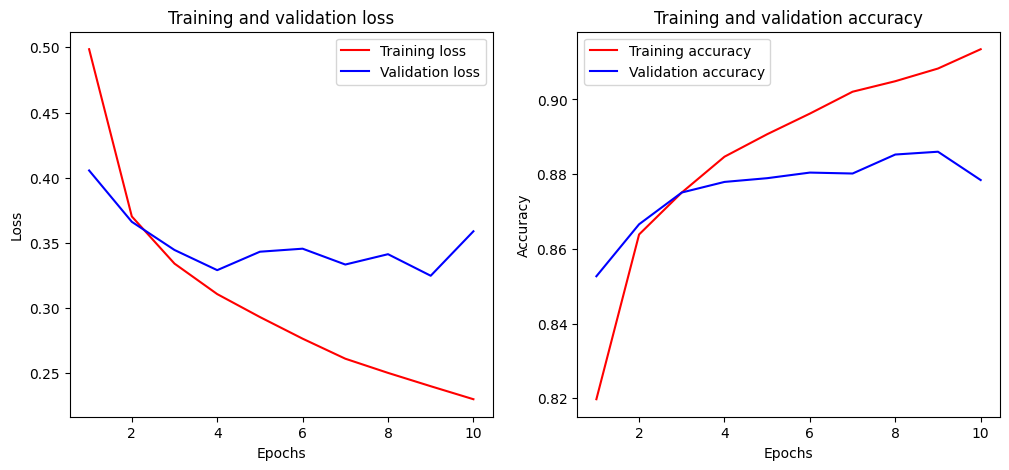

In [19]:
history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=10, validation_split=0.2)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [20]:
test_loss_1, test_acc_1 = model.evaluate(x_test_1, y_test_1)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8729
Test accuracy: 0.8729000091552734
Test loss: 0.3768370449542999


1/1 [==============================] - 0s 97ms/step
[[2.6830251e-06 7.8532281e-07 3.6921510e-06 7.9536655e-08 7.6426652e-08
  4.4219452e-04 4.4794615e-06 4.7143335e-03 7.4046750e-07 9.9483103e-01]]
Цифра, що розпізнана: 9


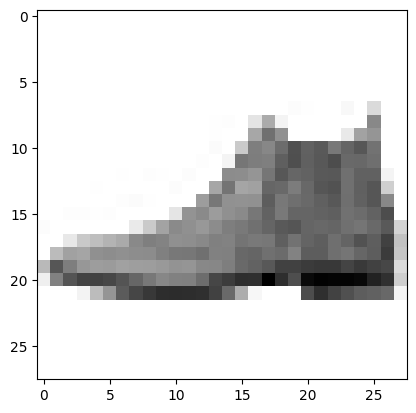

In [21]:
n=0
x=np.expand_dims(x_test_1[n], axis=0)
res = model.predict(x)
print(res)
print(f'Цифра, що розпізнана: {np.argmax(res)}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [22]:
predictions = model.predict(x_train_1)

1875/1875 [==============================] - 3s 2ms/step


In [23]:
predictions[1]

array([9.9873000e-01, 9.8536010e-16, 1.9784623e-06, 1.9416417e-07,
       2.0226594e-09, 3.7289886e-11, 1.2677606e-03, 2.0450751e-15,
       9.6229125e-10, 1.2440711e-11], dtype=float32)

In [24]:
np.argmax(predictions[1])

0

In [25]:
y_train_1[1]

0

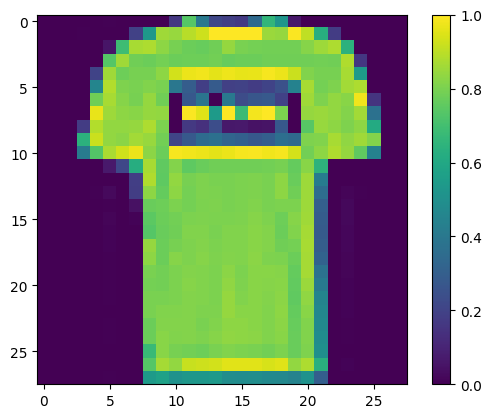

In [26]:
plt.figure()
plt.imshow(x_train_1[1])
plt.colorbar()
plt.grid(False)

In [27]:
class_names[np.argmax(predictions[1])]

'T-shirt/top'

In [28]:
predictions_all=model.predict(x_test_1)
predictions_all=np.argmax(predictions_all,axis=1)
print(predictions_all.shape)
print(predictions_all[:20])
print(y_test_1[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [29]:
mask=predictions_all==y_test_1
print(mask[:10])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(1271, 28, 28)


In [30]:
len(x_false)

1271

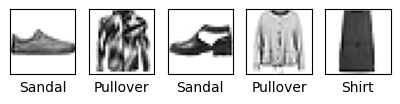

In [32]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [33]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 256 помилкових класифікацій
Trouser: 42 помилкових класифікацій
Pullover: 262 помилкових класифікацій
Dress: 74 помилкових класифікацій
Coat: 240 помилкових класифікацій
Sandal: 55 помилкових класифікацій
Shirt: 248 помилкових класифікацій
Sneaker: 27 помилкових класифікацій
Bag: 20 помилкових класифікацій
Ankle boot: 47 помилкових класифікацій


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[744   1  17  43   3   1 169   0  22   0]
 [  2 958   0  30   6   0   3   0   1   0]
 [ 13   0 738  14 112   0 112   0  11   0]
 [ 14   5  17 926   9   0  22   0   7   0]
 [  0   0  71  61 760   0  96   0  12   0]
 [  0   0   0   1   0 945   0  35   2  17]
 [ 66   0  54  36  57   0 752   0  35   0]
 [  0   0   0   0   0   8   0 973   0  19]
 [  3   0   1   4   2   1   2   7 980   0]
 [  0   0   0   1   0   7   1  38   0 953]]


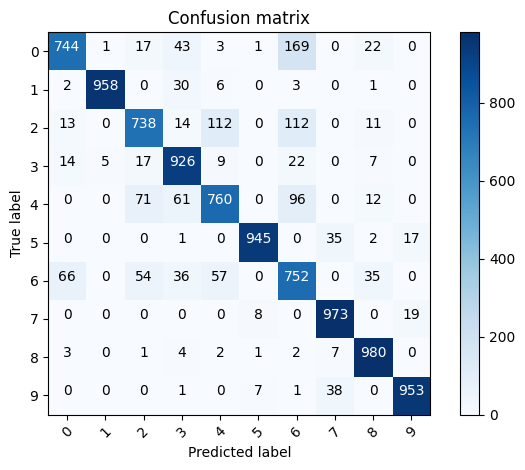

In [35]:
y_pred = np.argmax(model.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))

#ДЗ

In [ ]:
# # from tensorflow.keras.datasets import mnist
# from keras.datasets import mnist

# # Завантажуємо датасет
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.
y_train, y_test = y_train, y_test
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])


# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [ ]:
# Створимо нейронну мережу

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation != 0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)
class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    # Перший шар, який складається з 128 нейронів
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1, name='Inputs')
    # Другий шар, який складається з 256 нейронів
    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2, name='HiddenLayer1')
    # Вихідний шар
    self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes, name='Hypothesis')


  def __call__(self, x):
    # Передача даних через перші два шари та вихідний шар з функцією активації softmax
    x = self.layer_1(x)
    x = self.layer_2(x)

    return self.layer_3(x, activation=True)

In [ ]:
# В якості функції помилки (loss) в даному випадку зручно взяти крос-ентропію
def cross_entropy(y_pred, y_true):
    # Закодувати label в one hot vector
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Значення передбачення, щоб уникнути помилки log(0).
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Обчислення крос-ентропії
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

#     return accuracy
def accuracy(y_pred, y_true):
    # Convert predicted probabilities to predicted labels
    y_pred_labels = tf.argmax(y_pred, axis=1)

    # Convert predicted labels and true labels to int64
    y_pred_labels = tf.cast(y_pred_labels, tf.int64)
    y_true = tf.cast(y_true, tf.int64)

    # Compare predicted labels with true labels
    correct_predictions = tf.equal(y_pred_labels, y_true)

    # Compute accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

    return accuracy


SGD train

In [ ]:
neural_net = NN(name="mnist")
# # Функція навчання нейромережі
def train1(model, input_x, output_y,learning_rate=learning_rate):
    optimizer = tf.optimizers.SGD(learning_rate, momentum=0.0, nesterov=True)
    # optimizer = tf.optimizers.Adam(learning_rate)
    with tf.GradientTape() as tape:
        pred = model(input_x)
        loss = cross_entropy(pred, output_y)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Обчислюємо точність під час тренування
    accuracy_value = accuracy(pred, output_y)

    return loss, accuracy_value

Adam train

In [ ]:
neural_net = NN(name="mnist")
# # Функція навчання нейромережі
def train(model, input_x, output_y,learning_rate=learning_rate):
    # optimizer = tf.optimizers.SGD(learning_rate, momentum=0.0, nesterov=True)
    optimizer = tf.optimizers.Adam(learning_rate)
    with tf.GradientTape() as tape:
        pred = model(input_x)
        loss = cross_entropy(pred, output_y)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Обчислюємо точність під час тренування
    accuracy_value = accuracy(pred, output_y)

    return loss, accuracy_value

Тренування

SGD

In [ ]:
# Створимо екземпляр нейронної мережі
neural_net = NN(name="mnist")

# Тренування мережі
loss_history1 = []  # кожні display_step кроків зберігай в цьому списку поточну помилку нейромережі
accuracy_history1 = [] # кожні display_step кроків зберігай в цьому списку поточну точність нейромережі

# У цьому циклі ми будемо проводити навчання нейронної мережі
# із тренувального датасета train_data вилучи випадкову підмножину, на якій
# відбудеться тренування. Використовуй метод take, доступний для тренувального датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Оновлюємо ваги нейронної мережі
    # print(batch_x)
    # print(f"{batch_y.dtype=}")
    train1(neural_net, batch_x, batch_y, learning_rate=0.002)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        # print(batch_y.shape)
        # print(pred.shape)
        current_loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        accuracy_history1.append(acc)
        loss_history1.append(current_loss)
        print(f"Step {step:4}, Loss: {current_loss:7.2f}, Accuracy: {acc:.2%}")
        if acc > 0.99:
          print("Break by accuracy")
          break

Step  100, Loss:  359.55, Accuracy: 65.62%
Step  200, Loss:  150.88, Accuracy: 84.38%
Step  300, Loss:  119.09, Accuracy: 88.67%
Step  400, Loss:  140.07, Accuracy: 87.11%
Step  500, Loss:  110.97, Accuracy: 88.67%
Step  600, Loss:   88.03, Accuracy: 89.06%
Step  700, Loss:   53.26, Accuracy: 92.58%
Step  800, Loss:   89.04, Accuracy: 89.45%
Step  900, Loss:   73.71, Accuracy: 91.41%
Step 1000, Loss:   82.78, Accuracy: 93.36%
Step 1100, Loss:   71.57, Accuracy: 91.80%
Step 1200, Loss:   56.13, Accuracy: 94.53%
Step 1300, Loss:   76.01, Accuracy: 90.62%
Step 1400, Loss:  105.13, Accuracy: 91.02%
Step 1500, Loss:   65.77, Accuracy: 89.45%
Step 1600, Loss:   51.57, Accuracy: 93.75%
Step 1700, Loss:   62.12, Accuracy: 92.58%
Step 1800, Loss:   47.53, Accuracy: 95.31%
Step 1900, Loss:   61.10, Accuracy: 92.19%
Step 2000, Loss:   52.17, Accuracy: 93.36%
Step 2100, Loss:   41.35, Accuracy: 96.09%
Step 2200, Loss:   44.13, Accuracy: 95.31%
Step 2300, Loss:   33.73, Accuracy: 96.48%
Step 2400, 

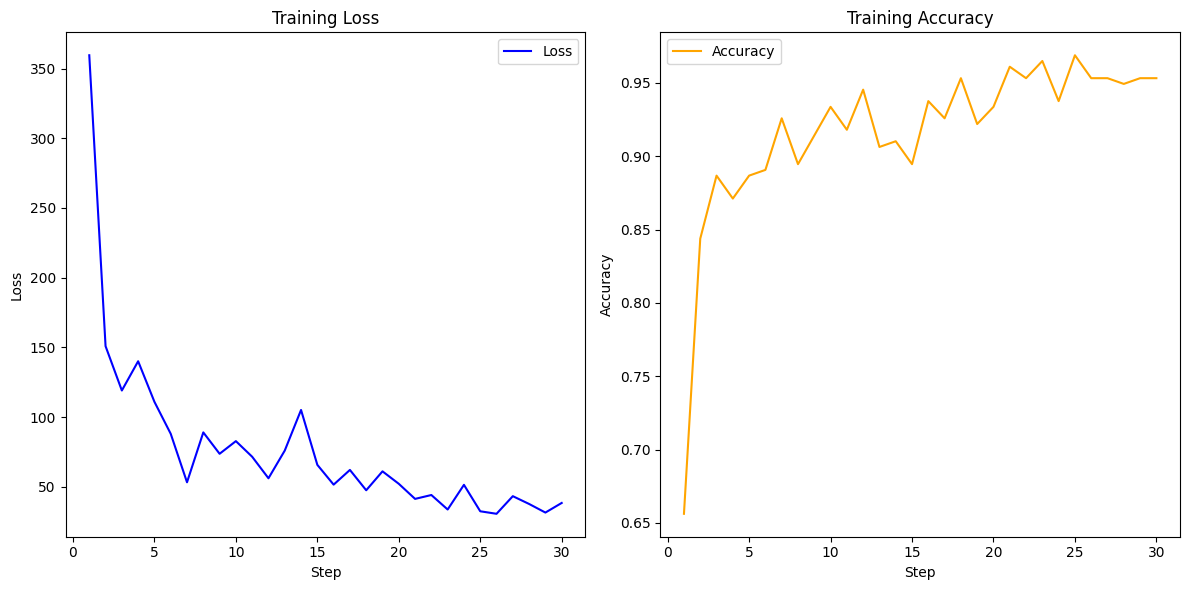

In [ ]:
# Виведення графіків
plt.figure(figsize=(12, 6))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history1) + 1), loss_history1, label='Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_history1) + 1), accuracy_history1, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Adam

In [ ]:
# Створимо екземпляр нейронної мережі
neural_net = NN(name="mnist")

# Тренування мережі
loss_history = []  # кожні display_step кроків зберігай в цьому списку поточну помилку нейромережі
accuracy_history = [] # кожні display_step кроків зберігай в цьому списку поточну точність нейромережі

# У цьому циклі ми будемо проводити навчання нейронної мережі
# із тренувального датасета train_data вилучи випадкову підмножину, на якій
# відбудеться тренування. Використовуй метод take, доступний для тренувального датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Оновлюємо ваги нейронної мережі
    # print(batch_x)
    # print(f"{batch_y.dtype=}")
    train(neural_net, batch_x, batch_y, learning_rate=0.002)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        # print(batch_y.shape)
        # print(pred.shape)
        current_loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        accuracy_history.append(acc)
        loss_history.append(current_loss)
        print(f"Step {step:4}, Loss: {current_loss:7.2f}, Accuracy: {acc:.2%}")
        if acc > 0.99:
          print("Break by accuracy")
          break

Step  100, Loss:  228.66, Accuracy: 76.17%
Step  200, Loss:  132.42, Accuracy: 83.59%
Step  300, Loss:  120.35, Accuracy: 87.50%
Step  400, Loss:   82.42, Accuracy: 91.02%
Step  500, Loss:   66.24, Accuracy: 90.62%
Step  600, Loss:   63.59, Accuracy: 92.58%
Step  700, Loss:   57.20, Accuracy: 95.31%
Step  800, Loss:   40.27, Accuracy: 95.31%
Step  900, Loss:   35.93, Accuracy: 94.14%
Step 1000, Loss:   35.31, Accuracy: 95.70%
Step 1100, Loss:   20.84, Accuracy: 98.05%
Step 1200, Loss:   17.20, Accuracy: 97.66%
Step 1300, Loss:   33.84, Accuracy: 96.48%
Step 1400, Loss:   35.03, Accuracy: 96.88%
Step 1500, Loss:   17.99, Accuracy: 97.66%
Step 1600, Loss:   49.22, Accuracy: 96.48%
Step 1700, Loss:   45.71, Accuracy: 97.27%
Step 1800, Loss:   22.54, Accuracy: 98.44%
Step 1900, Loss:   11.36, Accuracy: 98.83%
Step 2000, Loss:   32.05, Accuracy: 97.27%
Step 2100, Loss:   28.33, Accuracy: 98.83%
Step 2200, Loss:   12.55, Accuracy: 98.83%
Step 2300, Loss:   21.73, Accuracy: 97.66%
Step 2400, 

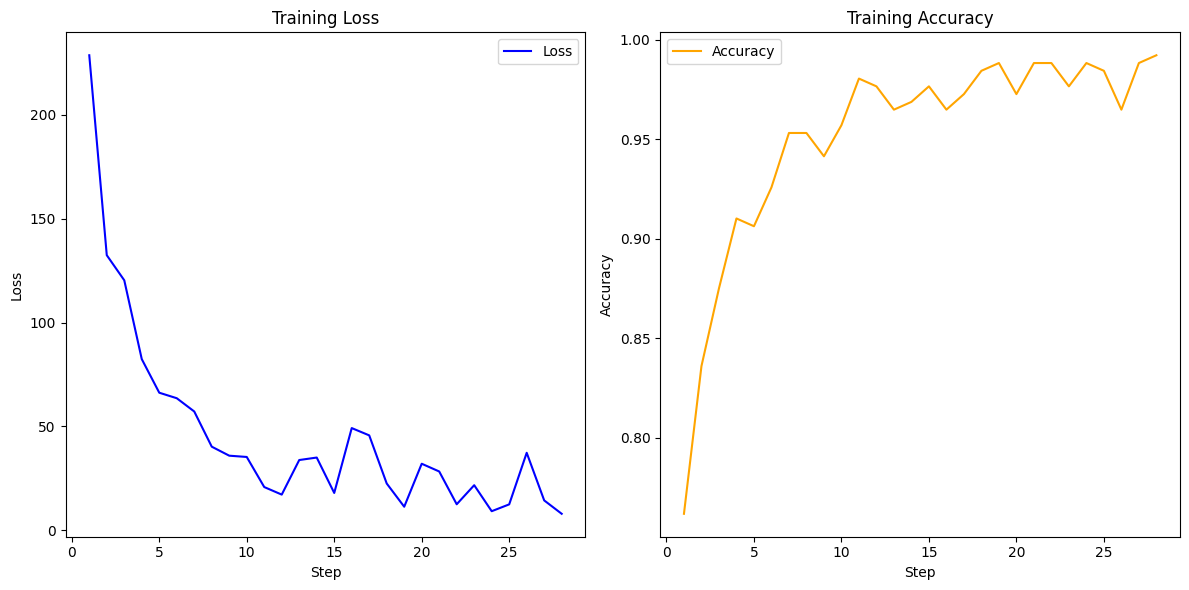

In [ ]:
# Виведення графіків
plt.figure(figsize=(12, 6))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history) + 1), loss_history, label='Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Навчання

In [ ]:
# Обчисліть точність навченої нейромережі
acc_mean = np.mean(accuracy_history)
print(f"{acc_mean=:%}")
# Тестування моделі на тестових даних
test_pred = neural_net(x_test)
test_acc = accuracy(test_pred, y_test).numpy()
test_pred_values = np.argmax(test_pred, axis=1)
print(f"{test_acc=:%}")

acc_mean=95.145088%
test_acc=95.020002%


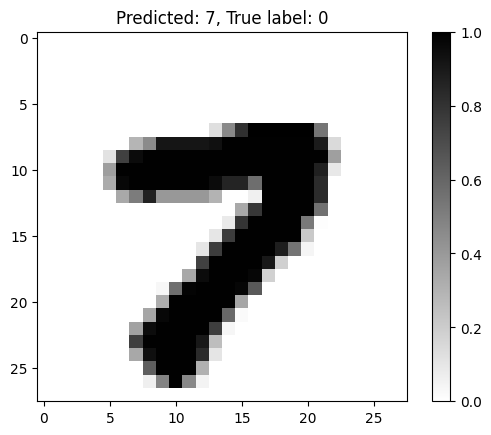

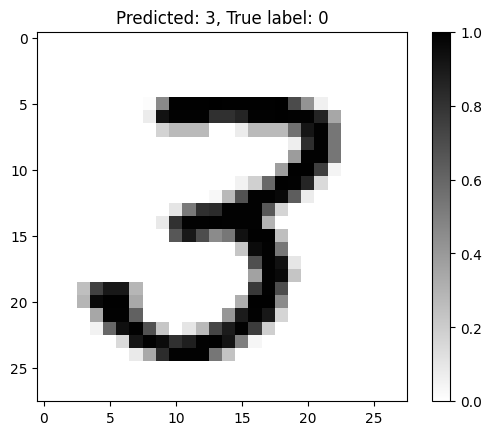

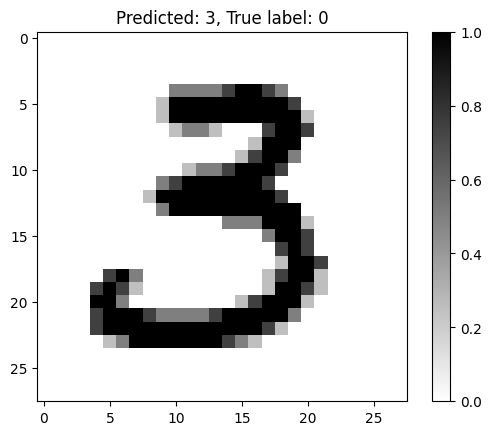

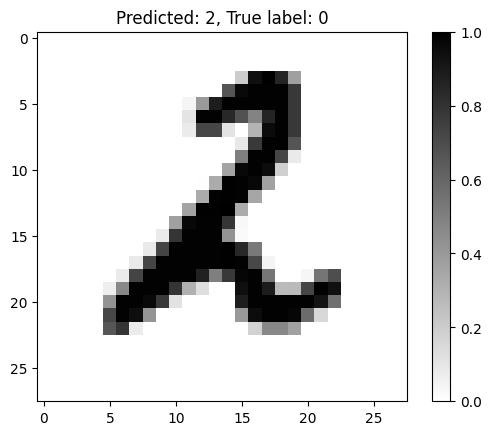

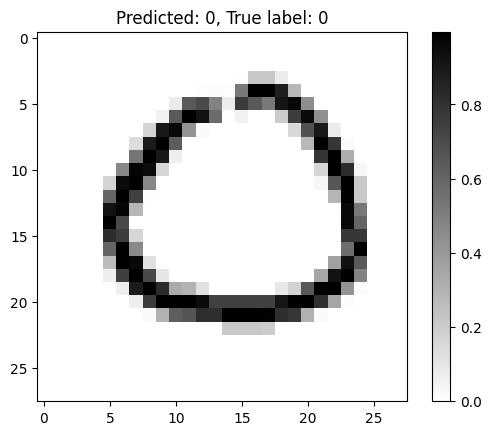

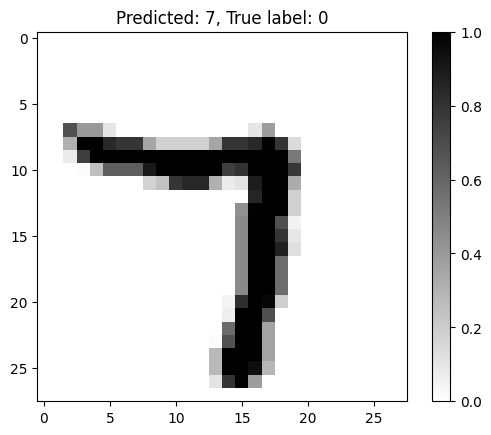

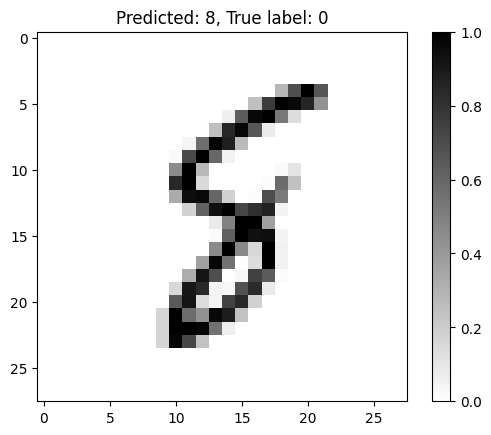

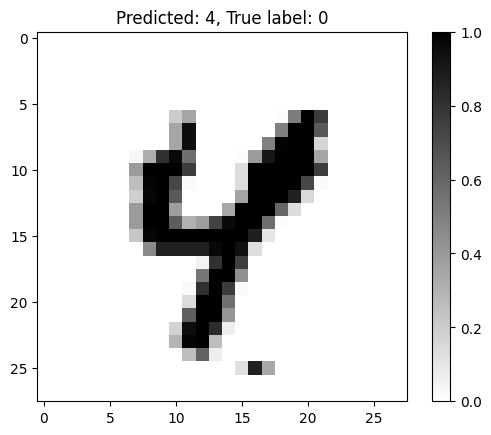

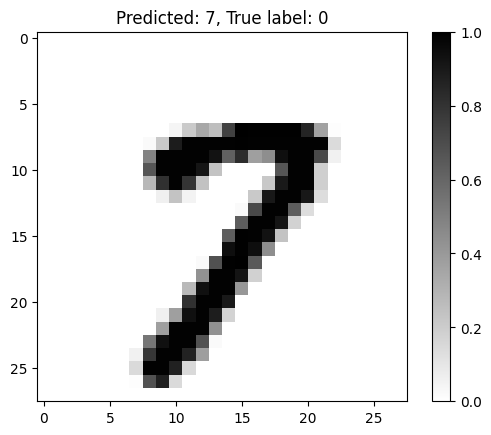

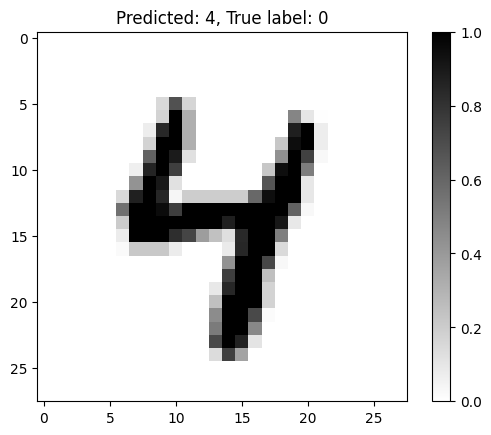

In [ ]:
# Протестуйте навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
# Виведіть зображення та випишіть  поруч відповідь нейромережі.
# Зробіть висновок про те, чи помиляється твоя нейронна мережа, і якщо так, то як часто?

# Функція для відображення зображення та його передбачення
def display_image_prediction(image, prediction, true_label):
    image = np.reshape(image, (28, 28))
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"Predicted: {prediction}, True label: {true_label}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


indices = np.random.choice(x_test.shape[0], size=10, replace=False)
test_images = x_test[indices]
true_labels = y_test[indices]


predictions = neural_net(test_images)

# Порівняємо прогнози з справжніми мітками та виведемо результати
for i in range(10):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(true_labels[i])
    display_image_prediction(test_images[i], predicted_label, true_label)



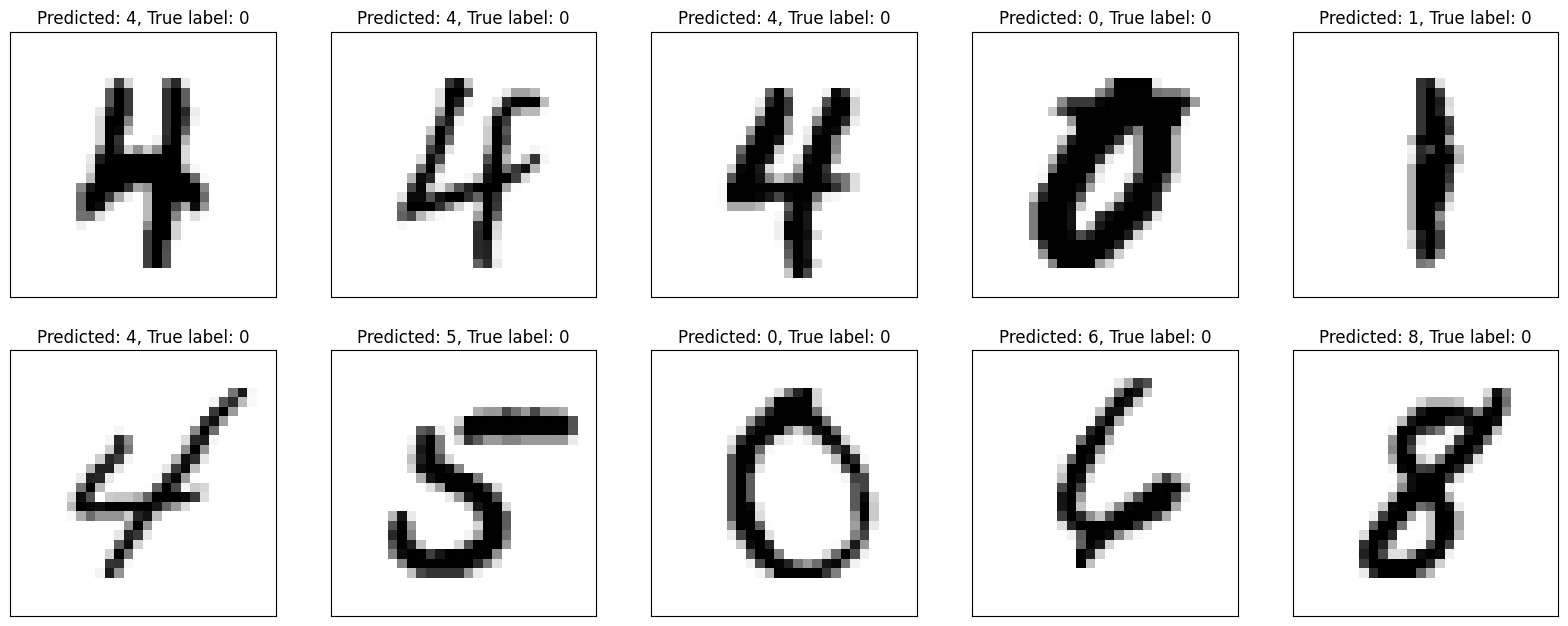

In [ ]:
import matplotlib.pyplot as plt

# Функція для відображення зображень та їх передбачення
def display_image_predictions(images, predictions, true_labels):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        # Змінюємо форму зображень перед відображенням
        image = images[i].reshape(28, 28)
        plt.imshow(image, cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(true_labels[i])
        plt.title(f"Predicted: {predicted_label}, True label: {true_label}")
    plt.show()

# Випадковим чином виберемо 10 зображень з тестової вибірки
indices = np.random.choice(x_test.shape[0], size=10, replace=False)
test_images = x_test[indices]
true_labels = y_test[indices]

# Отримаємо прогнози навченої нейромережі
predictions = neural_net(test_images)

# Відображення зображень та їх передбачення
display_image_predictions(test_images, predictions, true_labels)


In [ ]:
# Перетворення міток y_test з one-hot encoding на одномірний масив
y_test_labels = np.argmax(y_test, axis=None)

# Знайдення помилкових цифр
misclassified_indices = np.where(np.argmax(predictions, axis=1) != y_test_labels)[0]

# Підрахунок кількості помилкових зображень
num_misclassified = len(misclassified_indices)
print(f"Кількість помилкових зображень: {num_misclassified}")


Кількість помилкових зображень: 10


In [ ]:
target_names = [ f"Number: {i}" for i in range(0, num_classes)]
print(classification_report(y_test, test_pred_values, target_names=target_names))
cr = classification_report(y_test, test_pred_values, target_names=target_names, output_dict=True)
print(cr["accuracy"])

              precision    recall  f1-score   support

   Number: 0       0.97      0.99      0.98       980
   Number: 1       0.99      0.98      0.98      1135
   Number: 2       0.95      0.94      0.94      1032
   Number: 3       0.95      0.94      0.94      1010
   Number: 4       0.96      0.94      0.95       982
   Number: 5       0.95      0.93      0.94       892
   Number: 6       0.96      0.95      0.96       958
   Number: 7       0.96      0.95      0.95      1028
   Number: 8       0.88      0.95      0.91       974
   Number: 9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

0.9502


In [ ]:
# Протестуйте навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
# Виведіть зображення та випишіть  поруч відповідь нейромережі.
# Зробіть висновок про те, чи помиляється твоя нейронна мережа, і якщо так, то як часто?

predictions_all=model.predict(x_test)
predictions_all=np.argmax(predictions_all,axis=1)
print(predictions_all.shape)
print(predictions_all[:20])
print(y_test[:20])

313/313 [==============================] - 1s 5ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Матриця плутанини

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[ 968    0    1    1    0    1    6    1    2    0]
 [   0 1114    3    2    0    1    4    2    9    0]
 [   6    1  995    7    5    0    3    5    8    2]
 [   1    0   12  969    0    6    0    8   11    3]
 [   1    0    8    0  947    1    4    3    2   16]
 [   9    2    2   13    2  838   10    1   12    3]
 [   6    3    1    1    8    9  927    0    3    0]
 [   1   11   15    5    5    1    0  978    0   12]
 [   4    2    4   13    4    5   11    6  923    2]
 [   8    6    3   11   29    3    1   11    7  930]]


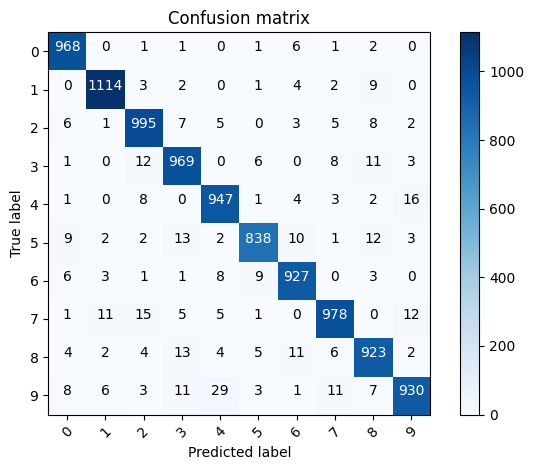

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=range(10))